In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Suppress a deprecation warning in pandas.
import numpy as np
import os
import pandas as pd
from typing import List, Tuple, Union
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Intake a path, where the header starts (None if there is no header), the header for the class labels, and those headers that should be removed from the returned 
# dataset. The data is processed and returned as two numpy arrays (data and labels).
def data_read_and_format(directory_path: str, header_line: Union[int, None], label_header: Union[str, None], remove_headers: Union[List[str], None]) -> Tuple[np.ndarray, np.ndarray]:
    # Verify that the path exists.
    try:
        file_name = os.listdir(directory_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"{os.path.basename(os.path.normpath(directory_path))}'s folder is not located in the following path from the present working directory: ./../../440-project-data/") from None
    
    # This processing function is designed to work on a specific data layout (only one tabular file). Raise an error if it is not formatted in this manner.
    if len(file_name) > 1:
        raise ValueError(f"There is more than one file located in the '{os.path.basename(os.path.normpath(directory_path))}' directory. Please make sure that all data is merged into one file.")
    
    # Read in the file according to its extension type. If it is not one of the 4 options listed below, raise an error saying that this function does not support 
    # that type of file.
    file_ext = os.path.splitext(file_name[0])[-1]
    if (file_ext == '.csv') or (file_ext == '.txt') or (file_ext == '.all-data'):
        data = pd.read_csv(directory_path + file_name[0], header=header_line)
    elif file_ext == '.xlsx' or file_ext == '.xls':
        data = pd.read_excel(directory_path + file_name[0], header=header_line)
    else:
        raise TypeError(f"The '{file_ext}' file extension is not supported by this data pre-processing function.")
    
    # Drop columns where there is missing data.
    data = data.dropna(axis=1)

    # Ordinally encode the "object" type features.
    for col_name, _ in data.iteritems():
        if data[col_name].dtype == 'O':
            data[col_name] = pd.factorize(data[col_name])[0]

    # If there is a header, remove the features specified and create the data and labels as numpy arrays. If there is not a header, it is assumed that the labels are 
    # the very last column of the input dataset, a warning is output letting the user know that they should verify that their data is formatted in this manner. Otherwise, 
    # no other columns are removed and they are converted into numpy arrays like in the other branch.
    if (header_line == 0) or (header_line):
        remove_headers.append(label_header)

        headers = data.columns.values.tolist()

        for header in remove_headers:
            headers.remove(header)

        X = data[headers].to_numpy()
        y = data[label_header].to_numpy()
    else:
        warnings.warn("If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.", Warning)
        num_cols = data.shape[1]

        headers = data.columns.values.tolist()

        headers.remove(num_cols - 1)

        X = data[headers].to_numpy()
        y = data[num_cols - 1].to_numpy()

    # Return the data and labels.
    return (X, y)

In [3]:
# Call the formatting function on the banknote authentication dataset and return it to the user.
def get_banknote_authentication() -> Tuple[np.ndarray, np.ndarray]:
    directory_path = r'./../../440-project-data/banknote-authentication/'
    header_line = None
    label_header = None
    remove_headers = None
    return data_read_and_format(directory_path, header_line, label_header, remove_headers)


# Call the formatting function on the Brazilian COVID-19 dataset and return it to the user.
def get_brazil_covid() -> Tuple[np.ndarray, np.ndarray]:
    directory_path = r'./../../440-project-data/brazil-covid/'
    header_line = 0
    label_header = "SARS-Cov-2 exam result"
    remove_headers = ["Patient ID"]
    return data_read_and_format(directory_path, header_line, label_header, remove_headers)


# Call the formatting function on the Pima Indian diabetes dataset and return it to the user.
def get_pima_diabetes() -> Tuple[np.ndarray, np.ndarray]:
    directory_path = r'./../../440-project-data/pima-diabetes/'
    header_line = 0
    label_header = 'Outcome'
    remove_headers = []
    return data_read_and_format(directory_path, header_line, label_header, remove_headers)


# Call the formatting function on the sonar mines dataset and return it to the user.
def get_sonar_mines() -> Tuple[np.ndarray, np.ndarray]:
    directory_path = r'./../../440-project-data/sonar-mines/'
    header_line = None
    label_header = None
    remove_headers = None
    return data_read_and_format(directory_path, header_line, label_header, remove_headers)


# Call the formatting function on the heart failure dataset and return it to the user.
def get_heart_failure() -> Tuple[np.ndarray, np.ndarray]:
    directory_path = r'./../../440-project-data/heart-failure/'
    header_line = 0
    label_header = 'HeartDisease'
    remove_headers = []
    return data_read_and_format(directory_path, header_line, label_header, remove_headers)


# Call the formatting function on the Titanic survivors dataset and return it to the user.
def get_titanic_survivors() -> Tuple[np.ndarray, np.ndarray]:
    directory_path = r'./../../440-project-data/titanic-survivors/'
    header_line = 0
    label_header = 'survived'
    remove_headers = []
    return data_read_and_format(directory_path, header_line, label_header, remove_headers)


# Call the formatting function on the wine quality dataset and return it to the user.
def get_wine_quality() -> Tuple[np.ndarray, np.ndarray]:
    directory_path = r'./../../440-project-data/wine-quality/'
    header_line = 0
    label_header = 'quality'
    remove_headers = ['Id']
    return data_read_and_format(directory_path, header_line, label_header, remove_headers)

In [4]:
X, y = get_banknote_authentication()
print(X)
print(y)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]
[0 0 0 ... 1 1 1]


/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_66261/1700635210.py:46: Warning: If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.
  warnings.warn("If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.", Warning)


In [5]:
X, y = get_brazil_covid()
print(X)
print(y)

[[13  0  0  0]
 [17  0  0  0]
 [ 8  0  0  0]
 ...
 [ 4  0  0  0]
 [10  0  0  0]
 [19  0  0  0]]
[0 0 0 ... 0 0 1]


In [6]:
X, y = get_pima_diabetes()
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

The type of 'X' is:  <class 'numpy.ndarray'>
The length of 'X' is:  208
The shape of 'X' is:  (208, 60)
The type of the first 'X' entry is:  <class 'numpy.ndarray'>
The type of the first 'X[0]' entry is:  <class 'numpy.float64'>
'X':  [[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
*******************************************
The type of 'y' is:  <class 'numpy.ndarray'>
The length of 'y' is:  208
The shape of 'y' is:  (208,)
The type of the first 'y' entry is:  <class 'numpy.int64'>
'y':  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

/var/folders/8b/9xj_42b90vx1qvx26pq56qgw0000gn/T/ipykernel_66261/1700635210.py:46: Warning: If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.
  warnings.warn("If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.", Warning)


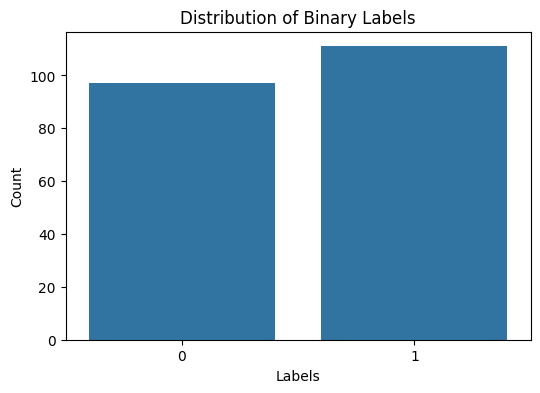

In [7]:
X, y = get_sonar_mines()

# Looking into the type, length, and shape of the data for a better understanding
# Explain X
print("The type of 'X' is: ", type(X))
print("The length of 'X' is: ", len(X))
print("The shape of 'X' is: ", X.shape)
print("The type of the first 'X' entry is: ", type(X[0]))
print("The type of the first 'X[0]' entry is: ", type(X[0][0]))
print("'X': ", X)
print("*******************************************")
# Explain y
print("The type of 'y' is: ", type(y))
print("The length of 'y' is: ", len(y))
print("The shape of 'y' is: ", y.shape)
print("The type of the first 'y' entry is: ", type(y[0]))
print("'y': ", y)

# Understanding how skewed the data is if at all
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Binary Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


The type of 'X' is:  <class 'numpy.ndarray'>
The length of 'X' is:  918
The shape of 'X' is:  (918, 11)
The type of the first 'X' entry is:  <class 'numpy.ndarray'>
The type of the first 'X[0]' entry is:  <class 'numpy.float64'>
'X':  [[40.   0.   0.  ...  0.   0.   0. ]
 [49.   1.   1.  ...  0.   1.   1. ]
 [37.   0.   0.  ...  0.   0.   0. ]
 ...
 [57.   0.   2.  ...  1.   1.2  1. ]
 [57.   1.   0.  ...  0.   0.   1. ]
 [38.   0.   1.  ...  0.   0.   0. ]]
*******************************************
The type of 'y' is:  <class 'numpy.ndarray'>
The length of 'y' is:  918
The shape of 'y' is:  (918,)
The type of the first 'y' entry is:  <class 'numpy.int64'>
'y':  [0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 

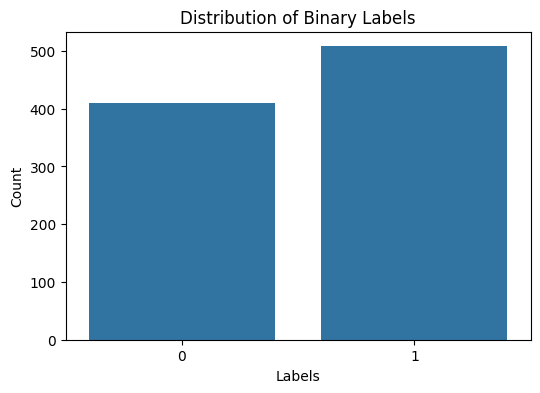

In [8]:
X, y = get_heart_failure()

# Looking into the type, length, and shape of the data for a better understanding
# Explain X
print("The type of 'X' is: ", type(X))
print("The length of 'X' is: ", len(X))
print("The shape of 'X' is: ", X.shape)
print("The type of the first 'X' entry is: ", type(X[0]))
print("The type of the first 'X[0]' entry is: ", type(X[0][0]))
print("'X': ", X)
print("*******************************************")
# Explain y
print("The type of 'y' is: ", type(y))
print("The length of 'y' is: ", len(y))
print("The shape of 'y' is: ", y.shape)
print("The type of the first 'y' entry is: ", type(y[0]))
print("'y': ", y)

# Understanding how skewed the data is if at all
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Binary Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()


The type of 'X' is:  <class 'numpy.ndarray'>
The length of 'X' is:  1309
The shape of 'X' is:  (1309, 6)
The type of the first 'X' entry is:  <class 'numpy.ndarray'>
The type of the first 'X[0]' entry is:  <class 'numpy.int64'>
'X':  [[   1    0    0    0    0    0]
 [   1    1    1    1    2    1]
 [   1    2    0    1    2    1]
 ...
 [   3 1304    1    0    0  936]
 [   3 1305    1    0    0  937]
 [   3 1306    1    0    0  938]]
*******************************************
The type of 'y' is:  <class 'numpy.ndarray'>
The length of 'y' is:  1309
The shape of 'y' is:  (1309,)
The type of the first 'y' entry is:  <class 'numpy.int64'>
'y':  [1 1 0 ... 0 0 0]


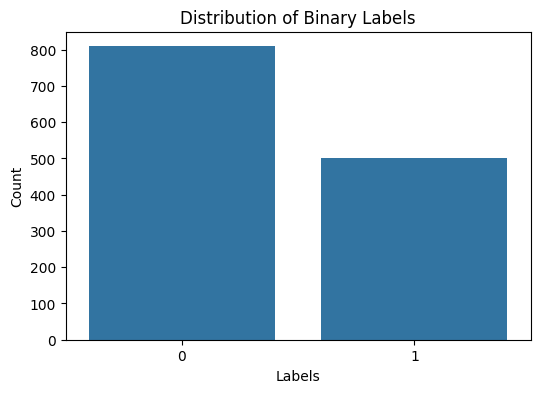

In [9]:
X, y = get_titanic_survivors()

# Looking into the type, length, and shape of the data for a better understanding
# Explain X
print("The type of 'X' is: ", type(X))
print("The length of 'X' is: ", len(X))
print("The shape of 'X' is: ", X.shape)
print("The type of the first 'X' entry is: ", type(X[0]))
print("The type of the first 'X[0]' entry is: ", type(X[0][0]))
print("'X': ", X)
print("*******************************************")
# Explain y
print("The type of 'y' is: ", type(y))
print("The length of 'y' is: ", len(y))
print("The shape of 'y' is: ", y.shape)
print("The type of the first 'y' entry is: ", type(y[0]))
print("'y': ", y)

# Understanding how skewed the data is if at all
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Binary Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

The type of 'X' is:  <class 'numpy.ndarray'>
The length of 'X' is:  1143
The shape of 'X' is:  (1143, 11)
The type of the first 'X' entry is:  <class 'numpy.ndarray'>
The type of the first 'X[0]' entry is:  <class 'numpy.float64'>
'X':  [[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.2    0.6    0.08  ...  3.45   0.58  10.5  ]
 [ 5.9    0.55   0.1   ...  3.52   0.76  11.2  ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]]
*******************************************
The type of 'y' is:  <class 'numpy.ndarray'>
The length of 'y' is:  1143
The shape of 'y' is:  (1143,)
The type of the first 'y' entry is:  <class 'numpy.int64'>
'y':  [5 5 5 ... 5 6 5]


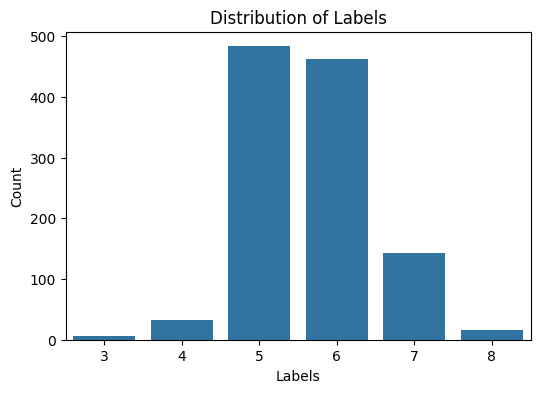

In [10]:
X, y = get_wine_quality()

# Looking into the type, length, and shape of the data for a better understanding
# Explain X
print("The type of 'X' is: ", type(X))
print("The length of 'X' is: ", len(X))
print("The shape of 'X' is: ", X.shape)
print("The type of the first 'X' entry is: ", type(X[0]))
print("The type of the first 'X[0]' entry is: ", type(X[0][0]))
print("'X': ", X)
print("*******************************************")
# Explain y
print("The type of 'y' is: ", type(y))
print("The length of 'y' is: ", len(y))
print("The shape of 'y' is: ", y.shape)
print("The type of the first 'y' entry is: ", type(y[0]))
print("'y': ", y)

# Understanding how skewed the data is if at all
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()